# Today we will have a competition to build the best predicting regression model! 

# You will build a regression model and predict sales given a marketing mix.

# Data Fields:

- TV: total ad spend on TV in thousands of dollars
- Radio: total ad spend on Radio in thousands of dollars
- Newspaper: total ad spend on Newspaper in thousands of dollars
- Sales: total sales (thousands of units)

# Your prediction is scored as MAE:

[mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error)

- MAE tells us how much our predictions are off on average in the units of our y (thousand units sold in this case)

## First up is plain old linear regression

[linear regression documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### Parameters to tune:

- fit_intercept should ONLY be false if 0 for your features has no meaning
- normalize is only required if your features are on different scales and you want an unofficial way of measuring feature importance when explaining to others
- ignore the other parameters for now (they're not relevant except in specific use cases)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('../data/sales.csv')

In [3]:
data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
# set our features and response
y, X = data['Sales'], data.drop('Sales', axis=1)

In [6]:
# create the model
lr = LinearRegression()

In [7]:
# fit the model
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# access the coefficients
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

### We will use 5-fold CV to score our model

- Use the `cross_val_score` to score your model
- What is consequence of not measuring on a "held out" test set?

In [9]:
from sklearn.model_selection import KFold, cross_val_score

In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)

In [11]:
# remember to substitute the name of your model for lr
-np.mean(cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=cv))

1.2738336254971752

This means our predictions are off by about 1.3K units on average!

In [12]:
# HINT: don't forget about gridsearch for tuning from last class!
from sklearn.model_selection import GridSearchCV

### Next is Lasso

[lasso documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

### Parameters to tune:

- fit_intercept should ONLY be false if 0 for your features has no meaning
- normalize is always required if variables are not on the same scale
- alpha = 0 is ordinary least squares while alpha = infinity forces all coefficients to 0
- usually small positive values for alpha perform best

### Don't forget to use the process we went through last class to validate your model!

In [13]:
from sklearn.linear_model import Lasso

In [14]:
lasso = Lasso(alpha=0.1, normalize=True)

### Next is Ridge

[ridge documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Parameters to tune:

- fit_intercept should ONLY be false if 0 for your features has no meaning
- normalize is always required if variables are not on the same scale
- alpha = 0 is ordinary least squares while alpha = infinity forces all coefficients to 0
- usually small positive values for alpha perform best

### Don't forget to use the process we went through last class to validate your model!

In [15]:
from sklearn.linear_model import Ridge

In [16]:
ridge = Ridge(alpha=0.1, normalize=True)

# Can you beat a MAE of 0.70?

# Individual Exercises:

- Plot the features against the response. Do you see a linear relationship?
- Create and fit a Lasso model with alpha=0.1. What do you notice? What about the coefficients?

In [17]:
import seaborn as sns
%matplotlib inline

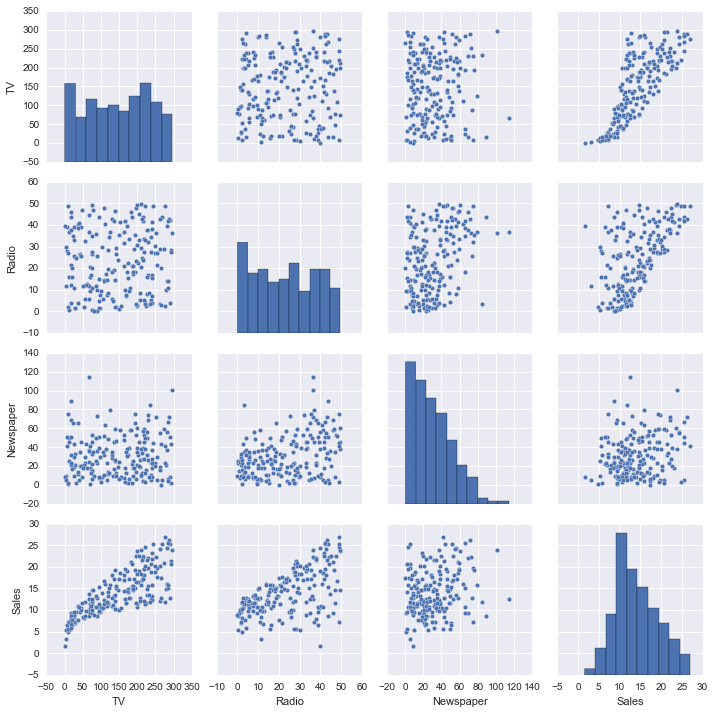

In [18]:
sns.pairplot(data)

In [19]:
data.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [20]:
lasso = Lasso(alpha=0.1, normalize=True)

In [22]:
lasso.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
lasso.coef_

array([ 0.03009928,  0.09746336,  0.        ])

In [24]:
-np.mean(cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=cv))

1.8478971267916271

Lasso dropped newspaper! But this comes at an expense to our overall score.

# Group Exercises:

- What's the lowest cross_val_score you can obtain as a group?
- Anything is fair game. Hints: tuning alpha, feature selection, creating new features

In [25]:
data['tv_radio'] = data['TV'] * data['Radio']

In [26]:
data['greater_50'] = data['TV'] > 50

In [27]:
y, X = data['Sales'], data.drop('Sales', axis=1)

In [28]:
linreg = LinearRegression()

In [29]:
-np.mean(cross_val_score(linreg, X, y, scoring='neg_mean_absolute_error', cv=cv))

0.44544703204139691

In [30]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
linreg.coef_

array([  1.34503482e-02,   4.28181444e-02,   6.20100453e-04,
         1.03521448e-03,   2.19703198e+00])

In [32]:
d = {'features': X.columns, 'coefficients': linreg.coef_}
pd.DataFrame(d)

coefficients    features
0      0.013450          TV
1      0.042818       Radio
2      0.000620   Newspaper
3      0.001035    tv_radio
4      2.197032  greater_50

### Interpreting the coefficients:

Sales = 0.01 TV + 0.04 Radio + 0.0006 Newspaper + 0.001 TV ** Radio + 2.2 * (TV>50)

This helps us capture that spending money on Radio increases the effectiveness of our TV advertising! (positive coefficient of tv_radio)

In marketing, we call this the 'halo' effect